In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline


In [9]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\sidha\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Initialize random number generator
np.random.seed(123)

In [5]:
# generating data

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

Text(0.5, 0, 'X2')

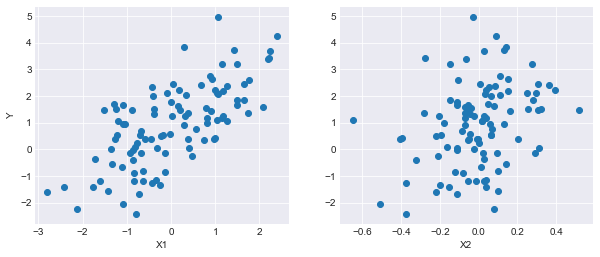

In [8]:
fig, ax = plt.subplots(1,2,figsize =(10,4))
ax[0].scatter(X1, Y)
ax[1].scatter(X2, Y)
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X1')
ax[1].set_xlabel('X2')

Text(0.5, 1.0, 'Y')

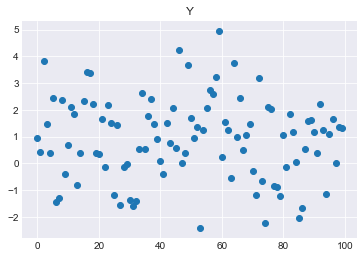

In [30]:
plt.plot(Y, 'o')
plt.title('Y')

In [23]:
# created new model which is container for the model random variables
basic_model = pm.Model()

# initiation of the model
with basic_model:
    
    # priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=9)
    # callinf normal constructor to
    beta = pm.Normal('beta', mu=0, sigma= 9, shape= 2)
    sigma = pm.HalfNormal('sigma', sigma= 0.8)
    
    # expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # likelihood (sampling distribution) of observation
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma= sigma, observed = Y)

In [33]:
Y_obs

Y_obs

In [ ]:
# next step is to get the posterior estimates of the unknown varibales in the model using MAP(Maximum a posterior)

# MODEL FITTING
### MAP methods

In [24]:
# Model fititng 
# 
map_estimate = pm.find_MAP(model=basic_model)
map_estimate


{'alpha': array(0.9065753),
 'beta': array([0.94846672, 2.60565278]),
 'sigma_log__': array(-0.04025501),
 'sigma': array(0.96054446)}

In [25]:
map_estimate = pm.find_MAP(model=basic_model, method='powell')

map_estimate

C:\Users\sidha\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:500: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)


{'alpha': array(0.90722948),
 'beta': array([0.94924807, 2.6076078 ]),
 'sigma_log__': array(-0.03942399),
 'sigma': array(0.96134302)}

### Sampling method

In [26]:
with basic_model:
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 66 seconds.


In [20]:
trace['alpha'][-5:]

array([0.73683648, 0.92181676, 0.92051223, 0.97002072, 0.97002072])

In [21]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()
    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 361 seconds.


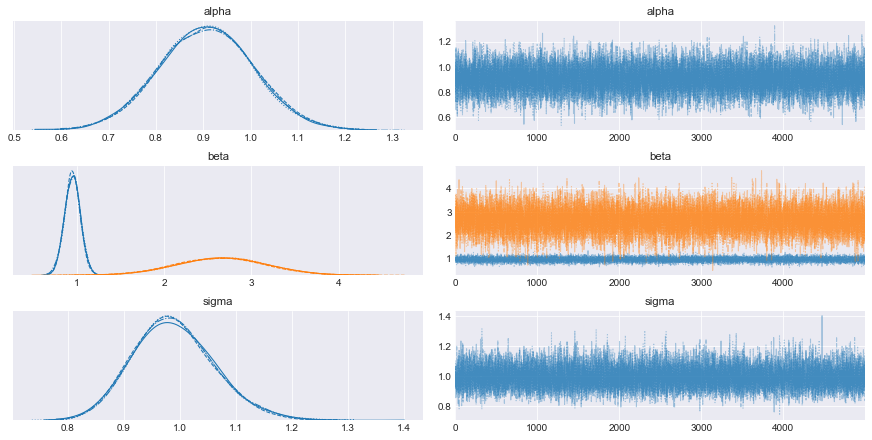

In [22]:
pm.traceplot(trace);
